In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns

% matplotlib inline
sns.set_style("whitegrid")


In [27]:
df=(pd.read_csv('911.csv'))
df.columns


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [28]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [30]:
#what are the top zip codes for calling 911?
df['zip'].value_counts().head(5)


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

How many reasons people call 911 for?

In [31]:
df['title'].nunique()

110

The most reason to call 911

In [32]:
df['Reason']=df['title'].apply(lambda t:t.split(":")[0])
#df['Reason'].nunique()
df['Reason'].value_counts()


EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

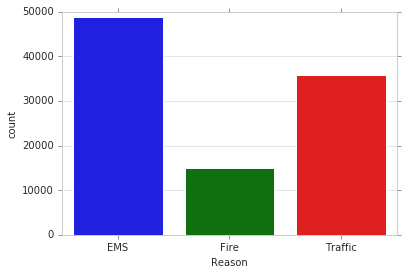

In [33]:
sns.countplot(x=df['Reason'], data=df)

In [34]:
#relation between reason and month, day

df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['year']=df['timeStamp'].apply(lambda time:time.year)
df['dayOfWeek']=df['timeStamp'].apply(lambda time:time.dayofweek)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['minute']=df['timeStamp'].apply(lambda time:time.minute)
df['second']=df['timeStamp'].apply(lambda time:time.second)


In [35]:
df['dayOfWeek'].head()

0    3
1    3
2    3
3    3
4    3
Name: dayOfWeek, dtype: int64

In [36]:
dmap={0:"Mon", 1:"Tue", 2:"wed", 3:"Thu",4:'Fri',5:'sat',6:"Sun"}

In [37]:
df['dayOfWeek']=df['dayOfWeek'].map(dmap)


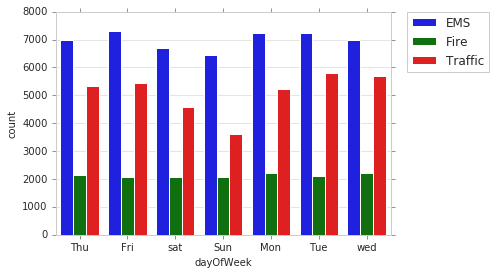

In [38]:
sns.countplot(x=df['dayOfWeek'],hue=df["Reason"],data=df)
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)


In [39]:
#The most busy day of the week
df["dayOfWeek"].value_counts()

Tue    15150
wed    14879
Fri    14833
Mon    14680
Thu    14478
sat    13336
Sun    12136
Name: dayOfWeek, dtype: int64

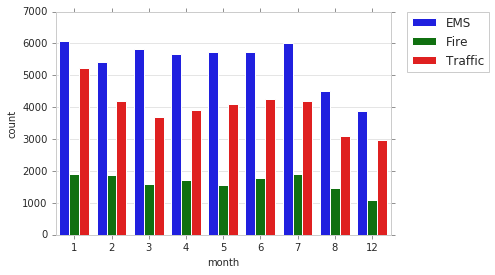

In [40]:
#the most busy month
df['month'].value_counts()
sns.countplot(x=df["month"], hue=df["Reason"])
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)

Since we have some months missing we will need another graph with continuous lines instead of discrete illustration in the previous graphs

In [41]:
byMonth=df.groupby("month").count()



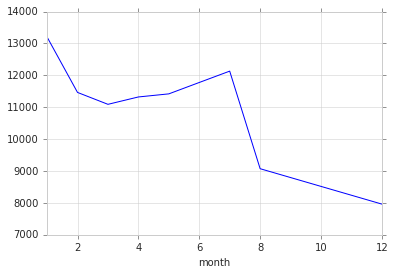

In [42]:
byMonth["twp"].plot()


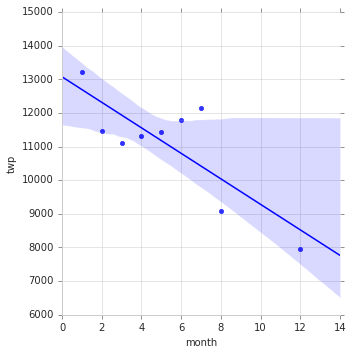

In [43]:
sns.lmplot(x="month", y="twp",data=byMonth.reset_index())

In [44]:
df["Date"]=df["timeStamp"].apply(lambda t:t.date())
df["Date"].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

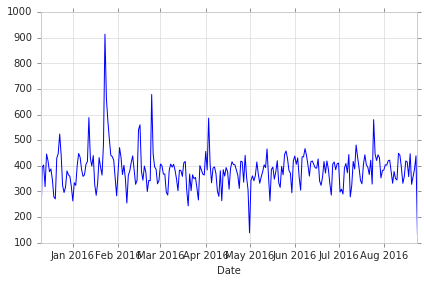

In [45]:
df.groupby("Date").count()["twp"].plot()
plt.tight_layout()

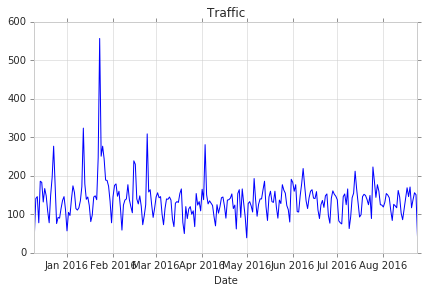

In [46]:
df[df["Reason"]=="Traffic" ].groupby("Date") .count() ["twp"].plot()
plt.tight_layout()
plt.title("Traffic")

In [47]:
hourofday=df.groupby(by=["dayOfWeek","hour"]).count()["Reason"].unstack()
hourofday.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274


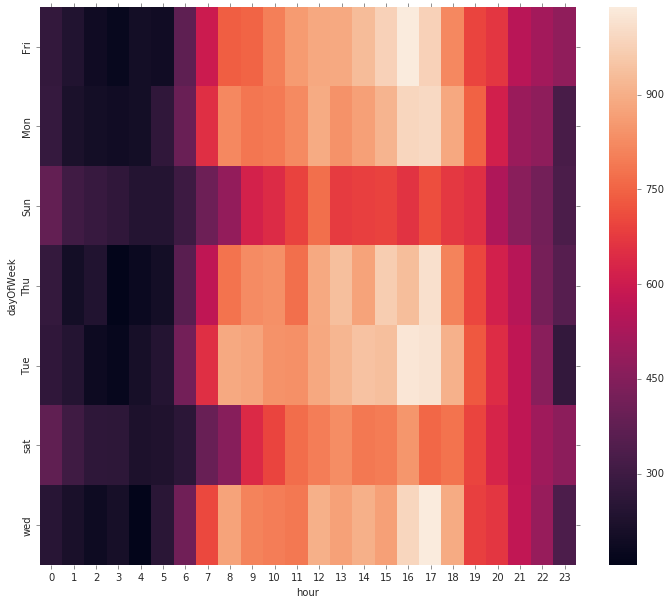

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(hourofday)

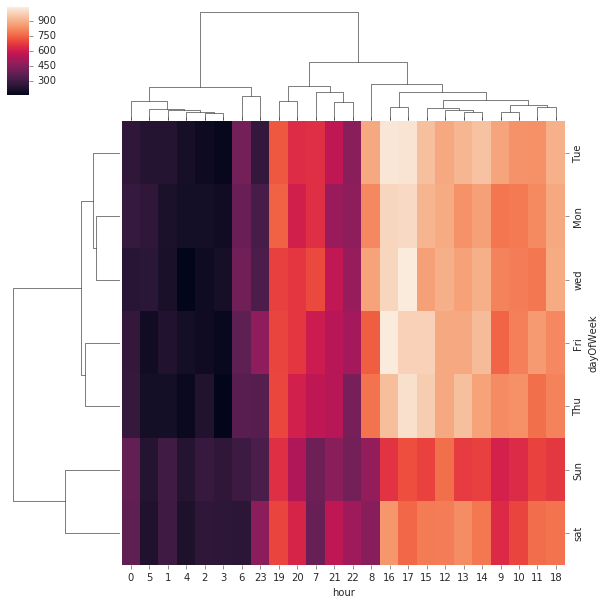

In [49]:
sns.clustermap(hourofday)

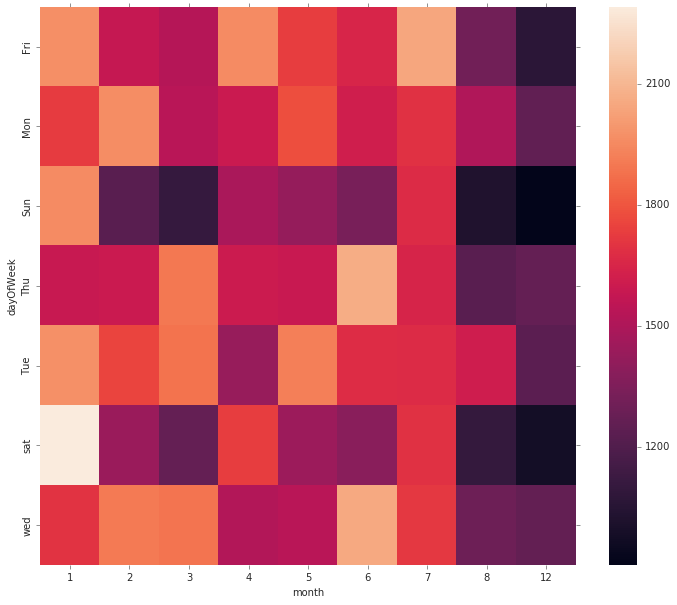

In [50]:
dayMonth = df.groupby(by=['dayOfWeek','month']).count()['Reason'].unstack()
plt.figure(figsize=(12,10))
sns.heatmap(dayMonth)